# PPMS Rotator
updated 4/22/23 by Justin
### This is general code for running magnetoresistance measurements with the rotator in the PPMS
-  Use Keithley 2182s for voltage measurements and 2400s for current sourcing.

#### First, define connections:
-  The pucks have 8 pins, labelled on the puck from 7 to 14. 
-  Initialize a BreakoutBoxConnections object and add connections by calling its functions.


#### then define measurement parameters:
-  Optionally name each measurement and assoicate it with connections on the matrix switch

#### Example usage
```python
from UtilsMeasurementSetup import *
from UtilsBasic import *
import time

C=BreakoutBoxConnections()
C.addMatrixSwitch()
C.addPPMS()
C.addRotPuckConnection(7,'HB+', SwitchLabel='a')
C.addRotPuckConnection(8,'HB-', SwitchLabel='b')
C.addRotPuckConnection(9,'HBT1', SwitchLabel='c')
C.addRotPuckConnection(10,'HBB6', SwitchLabel='d')
C.addRotPuckConnection(11,'HBB1', SwitchLabel='e')
C.addRotPuckConnection(12,'HBT6', SwitchLabel='f')
C.addRotPuckConnection(13,'HBB3', SwitchLabel='g')
C.addRotPuckConnection(14,'HBB4', SwitchLabel='h')
C.addInstrument(2400,25,SwitchLabels={'I+':'p','I-':'n'})
VM=C.addInstrument(2182,5,SwitchLabels={'V1+':'k','V1-':'l'})
#PL=C.addInstrument(6221,16,SwitchLabels={'P+':'m','P-':'o'}, Dummy=True)

#print(C.getSettingsString())
Angles=CreateArrayWithSteps([0,360,0],[5,-5])
# Temps=[300,250,200,150,100,80,60,40,20,10,5,2,350,300]

MS=MeasurementSettings(C)

MS.setVoltageMeasurementOptions(NumberofVPoints=30,WaitAfterOn=1, BiPolar=True)
MS.setCurrentSourceOptions(SourceComplianceVoltage=200,SourceCurrentRange=10e-3)
DC_Current=4e-5

MS.addMeasurementConnection('BareRxx',CurrentAmplitude=DC_Current,SwitchConnections=['HBB4,V1+','HBB6,V1-','HB+,I+','HB-,I-'])
MS.addMeasurementConnection('PtRxx',CurrentAmplitude=DC_Current,SwitchConnections=['HBB1,V1+','HBB3,V1-','HB+,I+','HB-,I-'])
MS.addMeasurementConnection('BareRxy',CurrentAmplitude=DC_Current,SwitchConnections=['HBT6,V1+','HBB6,V1-','HB+,I+','HB-,I-'])
MS.addMeasurementConnection('PtRxy',CurrentAmplitude=DC_Current,SwitchConnections=['HBT1,V1+','HBB1,V1-','HB+,I+','HB-,I-'])
MS.setMeasurementParams(Angle=Angles,MagneticField=140000,Temperature=300)
MS.FileSettings(MeasurementID='RT_Longitudinal_Test', SampleID='LMB713')
#MS.autoRunMeasurement()
note='Filling in temperature gaps. Try to find transition point for sign change of 6 fold term. (between 50K-100K)'
Temps=CreateArrayWithSteps([275,125],[-50])+CreateArrayWithSteps([110,10],[-10])+[5,2]
for T in Temps:
    MS.setMeasurementParams(Angle=Angles,MagneticField=140000,Temperature=T)

    MS.FileSettings(MeasurementID='{}K_{:.1e}A_14T'.format(T,DC_Current), SampleID='LMB713',MeasurementNote=note)
    MS.autoRunMeasurement()

```

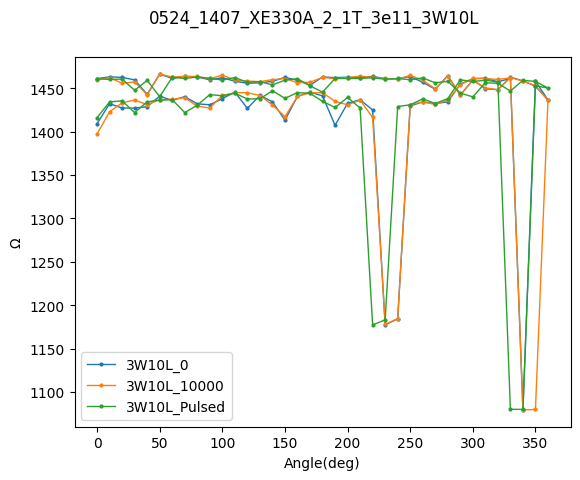

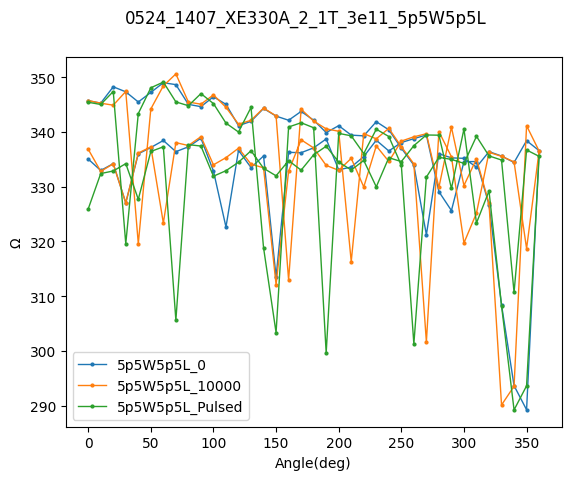

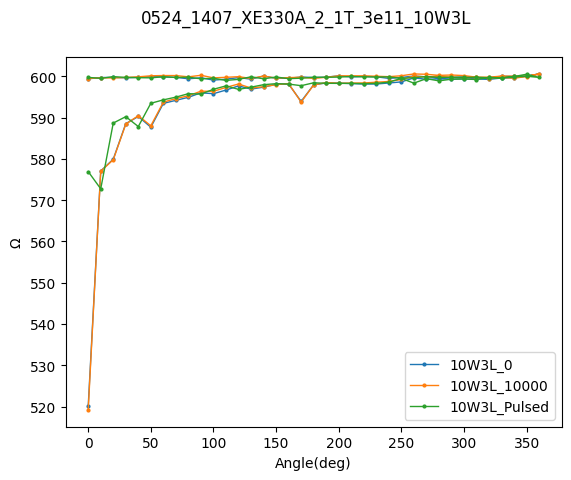

In [1]:
from UtilsMeasurementSetup import *
from UtilsBasic import *
import time

C=BreakoutBoxConnections()
C.addMatrixSwitch()
C.addPPMS()
C.addRotPuckConnection(7,'GND', SwitchLabel='a')
C.addRotPuckConnection(8,'10W3L+', SwitchLabel='b')
C.addRotPuckConnection(9,'4W7p5L+', SwitchLabel='c')
C.addRotPuckConnection(10,'5p5W5p5L+', SwitchLabel='d')
C.addRotPuckConnection(12,'3W10L', SwitchLabel='f')
C.addInstrument(2400,25,SwitchLabels={'I+':'k','I-':'l'})
VM=C.addInstrument(2182,5,SwitchLabels={'V+':'k','V-':'l'})
PL=C.addInstrument(6221,14,SwitchLabels={'P+':'p','P-':'o'})

#print(C.getSettingsString())
Angles=CreateArrayWithSteps([0,360,0],[10,-10])
# Temps=[300,250,200,150,100,80,60,40,20,10,5,2,350,300]

MS=MeasurementSettings(C)

MS.setVoltageMeasurementOptions(NumberofVPoints=50,WaitAfterOn=5, BiPolar=True)
MS.setCurrentSourceOptions(SourceComplianceVoltage=200,SourceCurrentRange=10e-3)
DC_Current=1e-4
MS.addMeasurementConnection('3W10L',CurrentAmplitude=DC_Current,SwitchConnections=['3W10L+,I+','GND,I-'])
MS.addMeasurementConnection('5p5W5p5L',CurrentAmplitude=DC_Current,SwitchConnections=['5p5W5p5L+,I+','GND,I-'])
MS.addMeasurementConnection('10W3L',CurrentAmplitude=DC_Current,SwitchConnections=['10W3L+,I+','GND,I-'])

PulseCurrentDensity=7e11
MS.addPulseConnection('3W10L',Pulser='Pulser',PulseAmplitude=2.7e-9*3e-6*PulseCurrentDensity,PulseWidth=5e-6,SwitchConnections=['3W10L+,P+','GND,P-'])
MS.addPulseConnection('5p5W5p5L',Pulser='Pulser',PulseAmplitude=2.7e-9*5.5e-6*PulseCurrentDensity,PulseWidth=5e-6,SwitchConnections=['5p5W5p5L+,P+','GND,P-'])
MS.addPulseConnection('10W3L',Pulser='Pulser',PulseAmplitude=2.7e-9*10e-6*PulseCurrentDensity,PulseWidth=5e-6,SwitchConnections=['10W3L+,P+','GND,P-'])

MS.setMeasurementParams(Angle=Angles,MagneticField=[10000,0],Temperature=300,WaitForSetpoints=True)
note='Add back switch and do pulse measurement'
MS.FileSettings(MeasurementID='LSC698_2_1T_3e11', SampleID='LSC698_2_Au(80)_Cr(5)_Pt(1p9)_Fe2O3(15nm)_Al2O3(0001)',MeasurementNote=note)
MS.RunRvsAngleMeasurementPulse(Verbose=True)


In [13]:
from UtilsMeasurementSetup import *
from UtilsBasic import *

C=BreakoutBoxConnections()
C.addInstrument(2400,25)
VM=C.addInstrument(2182,5)

#print(C.getSettingsString())

MS=MeasurementSettings(C, MeasurementID='test1', SampleID='CodeTesting')

MS.setVoltageMeasurementOptions(NumberofVPoints=30,WaitAfterOn=3, BiPolar=True)
MS.setCurrentSourceOptions(SourceComplianceVoltage=200,SourceCurrentRange=10e-3)
DC_Current=2e-5

MS.addMeasurementConnection('LongitudinalTest',CurrentAmplitude=DC_Current)
DC_c,average_v,std_v=MS.ConnectanddoVoltageMeasurement('LongitudinalTest', Verbose=True)
print('average R:')
print(average_v/DC_c)
print('std R:')
print(std_v/DC_c)

Added Keithley 2400 with name CurrentSource and GPIB number 25
Added Keithley 2182 with name Voltmeter and GPIB number 5
Performing Measurement LongitudinalTest...
Sourcing Current of 2.0e-05 from CurrentSource
Measuring Positive Voltages with Voltmeter
Sourcing Current of -2.0e-05 from CurrentSource
Measuring Negative Voltages with Voltmeter
Stopping output from CurrentSource
average R:
-378.1070054210526
std R:
0.05582130047669642


Visa Rescource List:


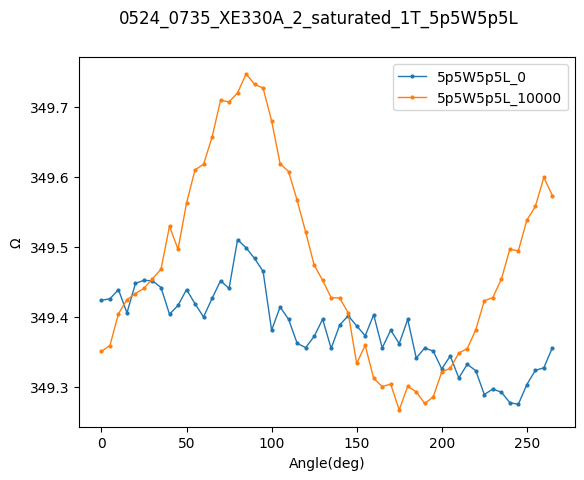

In [1]:
from UtilsMeasurementSetup import *
PlotSMR('./data/PPMS_SMR/XE330A_2_Pt(2p5)_Fe2O3(15nm)_Al2O3(0001)/0524_0735_XE330A_2_saturated_1T.csv')